In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("/Users/mohao/Downloads/india_population_forecast.csv")

In [3]:
data.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
0,2020,1380004385,1.04,13970396,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
1,2025,1445011620,0.92,13001447,-464081,30.0,2.24,486,37.6,542742539,17.66,8184437460,2
2,2030,1503642322,0.80,11726140,-440124,31.7,2.24,506,40.4,607341981,17.59,8548487400,1
3,2035,1553723810,0.66,10016298,-415732,33.3,2.24,523,43.5,675456367,17.48,8887524213,1
4,2040,1592691513,0.50,7793541,-415736,35.0,2.24,536,46.7,744380367,17.31,9198847240,1


In [4]:
data.isnull().sum()

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
India Global Rank               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          7 non-null      int64  
 1   Population                    7 non-null      int64  
 2   Yearly % Change               7 non-null      float64
 3   Yearly Change                 7 non-null      int64  
 4   Migrants (net)                7 non-null      int64  
 5   Median Age                    7 non-null      float64
 6   Fertility Rate                7 non-null      float64
 7   Density (P/Km²)               7 non-null      int64  
 8   Urban Pop %                   7 non-null      float64
 9   Urban Population              7 non-null      int64  
 10  Country's Share of World Pop  7 non-null      float64
 11  World Population              7 non-null      int64  
 12  India Global Rank             7 non-null      int64  
dtypes: float6

In [6]:
max_change=data["Yearly Change"].max()
print(max_change)
min_change=data["Yearly Change"].min()
for i in range(data.shape[0]):
       data.iloc[i,3]=(data.iloc[i,3]-min_change)/(max_change-min_change)
data.head()

13970396


,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
0,2020,1380004385,1.04,1.000000,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
1,2025,1445011620,0.92,0.905552,-464081,30.0,2.24,486,37.6,542742539,17.66,8184437460,2
2,2030,1503642322,0.80,0.781241,-440124,31.7,2.24,506,40.4,607341981,17.59,8548487400,1
3,2035,1553723810,0.66,0.614574,-415732,33.3,2.24,523,43.5,675456367,17.48,8887524213,1
4,2040,1592691513,0.50,0.397910,-415736,35.0,2.24,536,46.7,744380367,17.31,9198847240,1


In [7]:
#violin picture


In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Yearly Change'>

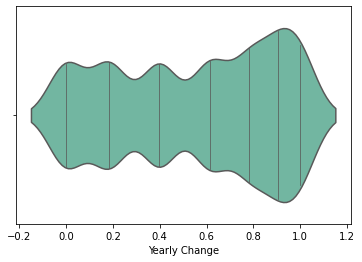

In [9]:
sns.violinplot(x=data["Yearly Change"], palette="Set2", split=True, scale="count", inner="stick", scale_hue=False, bw=.2)

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:>

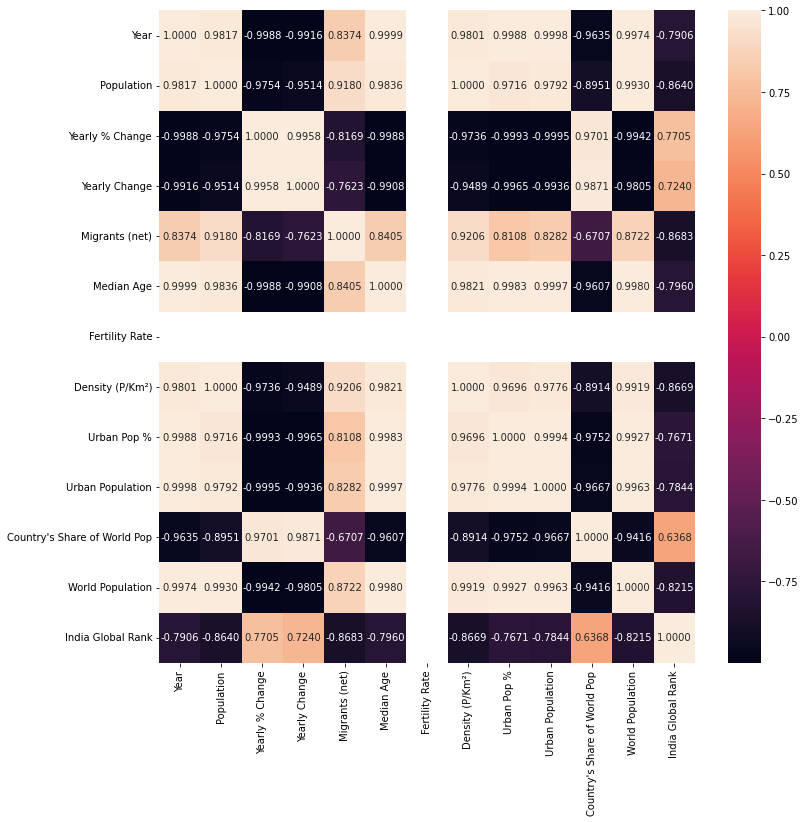

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt='.4f')

In [18]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [19]:
make_corr_df(data)

,f1,f2,corr
0,Population,Density (P/Km²),0.999964
1,Density (P/Km²),Population,0.999964
2,Median Age,Year,0.999885
3,Year,Median Age,0.999885
4,Year,Urban Population,0.999810
...,...,...,...
109,World Population,India Global Rank,0.821530
110,Migrants (net),Yearly % Change,0.816920
111,Yearly % Change,Migrants (net),0.816920
112,Urban Pop %,Migrants (net),0.810771


In [20]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [21]:
corr_groups(make_corr_df(data))

[['Density (P/Km²)',
  'World Population',
  'Median Age',
  'Year',
  'Urban Population',
  'Yearly % Change',
  'Urban Pop %',
  'Yearly Change',
  'Migrants (net)',
  "Country's Share of World Pop",
  'India Global Rank',
  'Population']]